# Še malo vaj iz vizualizacije podatkov

In [1]:
import pandas as pd
import plotnine as p9

## Naloga 1: Evropski borzni indeksi

Oglej si podatke o cenah glavnih evropskih borznih indeksov - EuStockMarkets. Datoteko csv s podatki najdeš na spletni učilnici.

* Podatke ustrezno pripravi za obdelavo (tidy data):
    * Tabela naj vsebuje stolpce `t` (časovna točka), `indeks` (ime borznega indeksa) in `vrednost` (vrednost za dani indeks).
* Nariši graf, ki prikazuje gibanje vseh štirih indeksov v času. 
* Največjo vrednost (za vsak indeks posebej) na intervalu od 500 do 1000 označi s krogcem. 

Podrobnosti so prikazane na grafu graf1 (pdf datoteka na spletni učilnici). Graf izvozi v pdf datoteko.


<details><summary>Namig</summary>
Posebej sestavi tabelo maksimumov za posamezne indekse (seveda na intervalu).
</details>

In [2]:
data = pd.read_csv("datoteke/EuStockMarkets.csv")
data.rename({"rownames": "t"}, axis=1, inplace=True)
data

,t,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...,...
1855,1856,5460.43,7721.3,3939.5,5587.6
1856,1857,5285.78,7447.9,3846.0,5432.8
1857,1858,5386.94,7607.5,3945.7,5462.2
1858,1859,5355.03,7552.6,3951.7,5399.5


In [3]:
data = data.melt(
    id_vars=["t"],
    value_vars=["DAX", "SMI", "CAC", "FTSE"],
    var_name="indeks",
    value_name="vrednost", 
    ignore_index=False
)
data

,t,indeks,vrednost
0,1,DAX,1628.75
1,2,DAX,1613.63
2,3,DAX,1606.51
3,4,DAX,1621.04
4,5,DAX,1618.16
...,...,...,...
1855,1856,FTSE,5587.60
1856,1857,FTSE,5432.80
1857,1858,FTSE,5462.20
1858,1859,FTSE,5399.50


In [4]:
maks = data.loc[(500 <= data.t) & (data.t <= 1000), ['indeks', 'vrednost']].groupby("indeks").agg("max")
maks

,vrednost
indeks,
CAC,2355.90
DAX,2274.62
FTSE,3520.30
SMI,3178.40


In [5]:
result_df = maks.merge(data, left_index=True, right_on=["indeks"], suffixes=('_max', ''))
result_df = result_df[result_df.vrednost_max == result_df.vrednost]
result_df.drop(["vrednost_max"], axis=1, inplace=True)

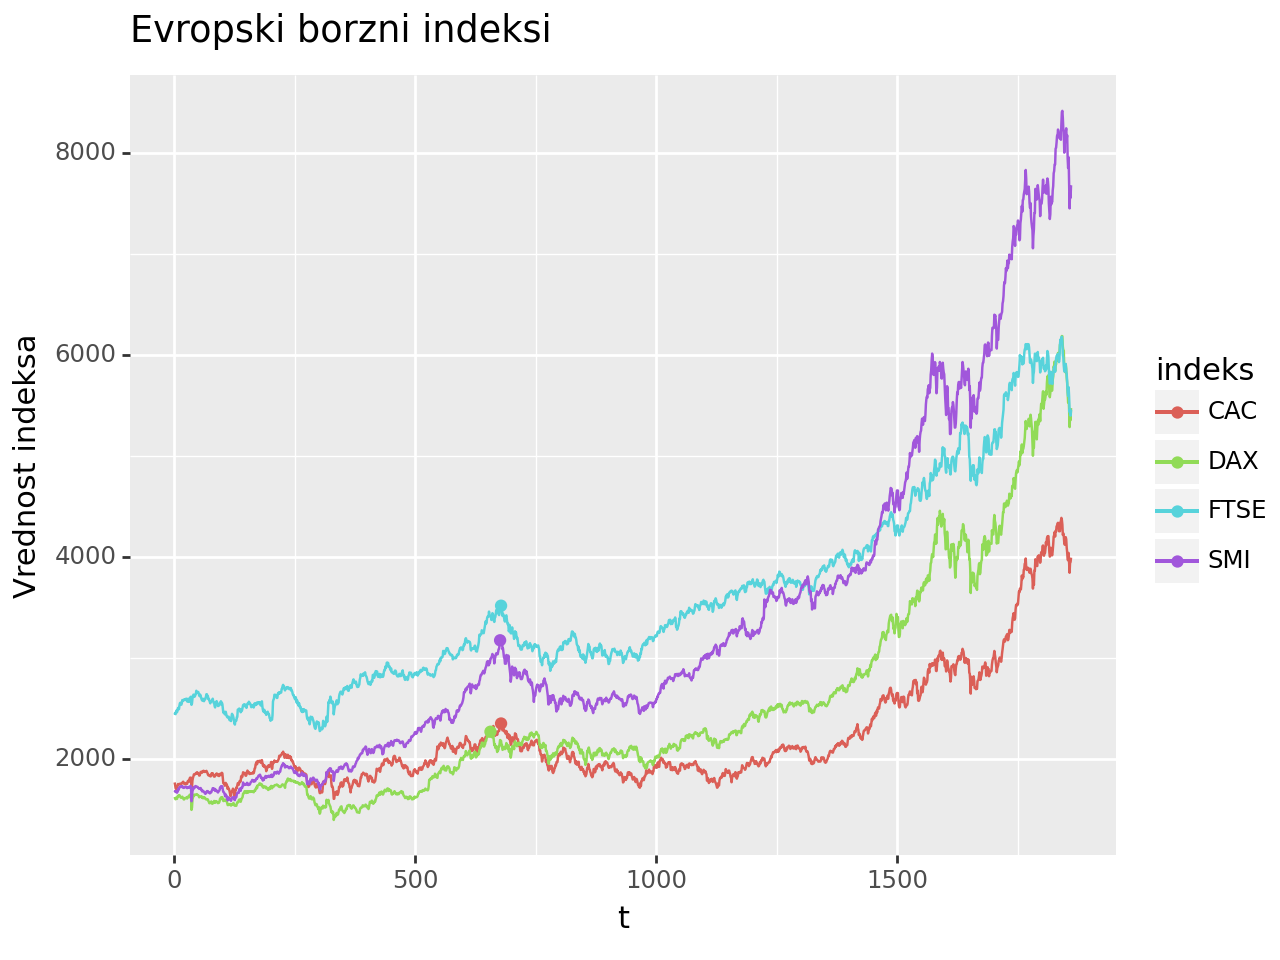

<Figure Size: (640 x 480)>

In [6]:
graf1 = (
    p9.ggplot(data) +
    p9.aes(x="t", y="vrednost", color='indeks') +
    p9.geom_line() + 
    p9.geom_point(data=result_df, mapping=p9.aes(x="t", y="vrednost", color=maks.index)) + 
    p9.labs(title="Evropski borzni indeksi", y="Vrednost indeksa")
)
graf1

In [7]:
p9.save_as_pdf_pages([graf1], "graf1.pdf", verbose=False)

## 2. naloga: Napovedi indeksa DAX

Oglej si podatke o indeksu DAX (v tabeli EuStockMarkets - podanih je 1860 zaporednih vrednosti).
V tabeli napovedi.csv so shranjene napovedi indeksa DAX za omenjenih 1860 časovnih točk in še dodatnih 400 časovnih točk. Nariši graf gibanja vrednosti indeksa DAX in vrednosti napovedi. Zadnjih 400 vrednosti napovedi naj bo povezanih s črtkano črto. Podrobnosti so prikazane na grafu graf2 (pdf datoteka na spletni učilnici). Graf izvozi v datoteko pdf.

<details><summary>Namig</summary>
Najprej sestavi <i>urejeno</i> podatkovno tabelo napovedi in dejanskih vrednosti indeksa DAX.
</details>

In [8]:
podatki_dax = data.loc[data.indeks == "DAX"]
podatki_dax = podatki_dax.drop(columns="indeks")
napovedi = pd.read_csv("datoteke/napovedi.csv")
napovedi

,t,napoved
0,1,1973.256188
1,2,1971.596357
2,3,1969.940175
3,4,1968.287641
4,5,1966.638755
...,...,...
2255,2256,7502.051620
2256,2257,7508.618686
2257,2258,7515.189402
2258,2259,7521.763765


In [9]:
podatki_dax.head()

,t,vrednost
0,1,1628.75
1,2,1613.63
2,3,1606.51
3,4,1621.04
4,5,1618.16


In [10]:
napovedi["je_napoved"] = napovedi.t > 1860

In [11]:
napovedi = napovedi.merge(podatki_dax, on="t", how="left")
napovedi.head()

,t,napoved,je_napoved,vrednost
0,1,1973.256188,False,1628.75
1,2,1971.596357,False,1613.63
2,3,1969.940175,False,1606.51
3,4,1968.287641,False,1621.04
4,5,1966.638755,False,1618.16


In [12]:
napovedi = napovedi.melt(
    id_vars=["t", "je_napoved"],
    value_vars=["napoved", "vrednost"],
    var_name="tip",
    value_name="vrednost_ind",
)

In [13]:
barve = ["dodgerblue", "violet"]
oznake = ["Napoved", "Dejanska vrednost"]

c:\Users\alampe\Documents\Teaching-FMF\PAPVP\venv\lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 400 rows containing missing values.


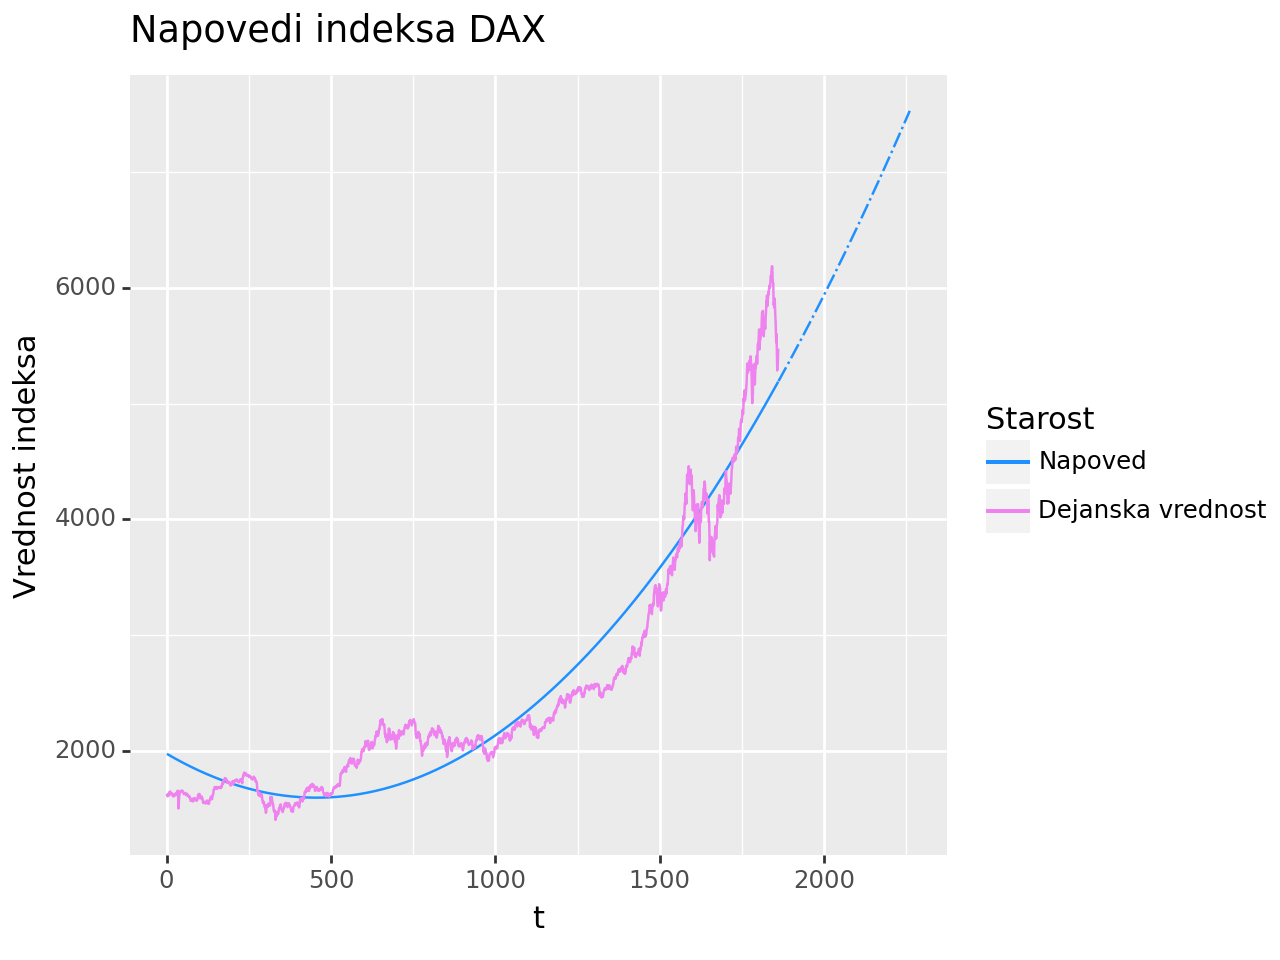

<Figure Size: (640 x 480)>

In [14]:
graf2 = (
    p9.ggplot(napovedi) +
    p9.aes(x="t", y="vrednost_ind", color="tip", linetype="je_napoved") +
    p9.scale_color_manual(name="Starost", labels=oznake, values=barve) +
    p9.scale_linetype_manual(guide=None, values=("solid", "dashdot")) +
    p9.geom_line() +
    p9.labs(title="Napovedi indeksa DAX", y="Vrednost indeksa")
)
graf2

In [15]:
p9.save_as_pdf_pages([graf2], "graf2.pdf", verbose=False)

c:\Users\alampe\Documents\Teaching-FMF\PAPVP\venv\lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 400 rows containing missing values.
